Found 402 images belonging to 2 classes.
Found 201 images belonging to 2 classes.
Found 102 images belonging to 2 classes.
Stochastic Gradient Descent


7/7 [==============================] - 10s 1s/step - loss: 0.1997 - accuracy: 0.9412
Test Accuracy: 94.12%
7/7 [==============================] - 10s 1s/step
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        51
           1       0.92      0.96      0.94        51

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102

7/7 [==============================] - 10s 1s/step


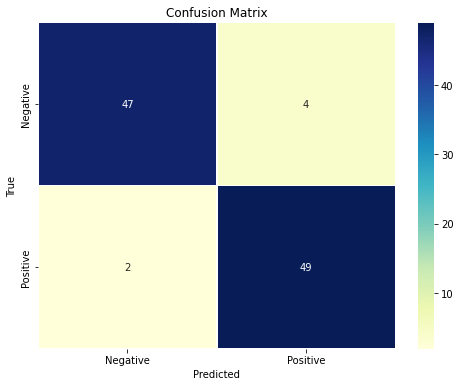

Adam


7/7 [==============================] - 10s 1s/step - loss: 0.1817 - accuracy: 0.9412
Test Accuracy: 94.12%
7/7 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.94      0.94      0.94        51

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102

7/7 [==============================] - 10s 1s/step


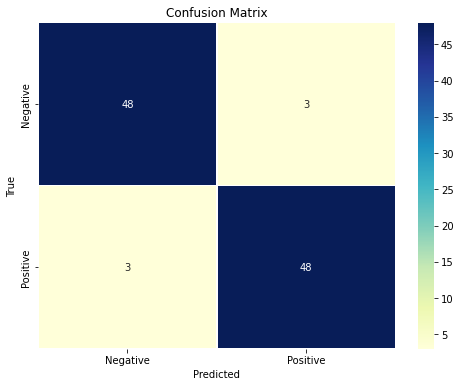

RMSprop (Root Mean Square Propagation)


7/7 [==============================] - 10s 1s/step - loss: 0.1729 - accuracy: 0.9510
Test Accuracy: 95.1%
7/7 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        51
           1       0.96      0.94      0.95        51

    accuracy                           0.95       102
   macro avg       0.95      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102

7/7 [==============================] - 10s 1s/step


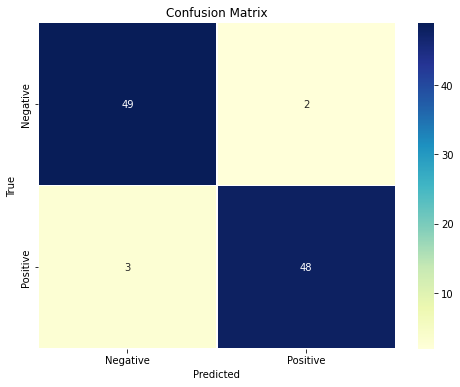

Adagrad (Adaptive Gradient Algorithm)


7/7 [==============================] - 11s 1s/step - loss: 0.2487 - accuracy: 0.9216
Test Accuracy: 92.16%
7/7 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        51
           1       0.88      0.98      0.93        51

    accuracy                           0.92       102
   macro avg       0.93      0.92      0.92       102
weighted avg       0.93      0.92      0.92       102

7/7 [==============================] - 11s 1s/step


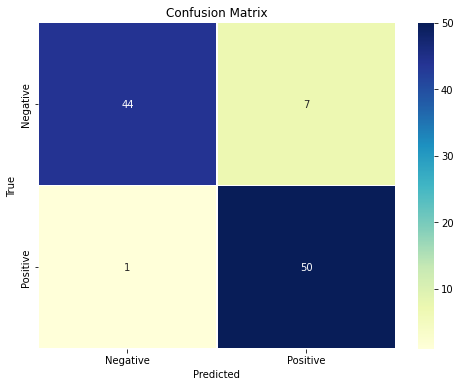

Adadelta


7/7 [==============================] - 11s 1s/step - loss: 0.2049 - accuracy: 0.9412
Test Accuracy: 94.12%
7/7 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.94      0.94      0.94        51

    accuracy                           0.94       102
   macro avg       0.94      0.94      0.94       102
weighted avg       0.94      0.94      0.94       102

7/7 [==============================] - 11s 1s/step


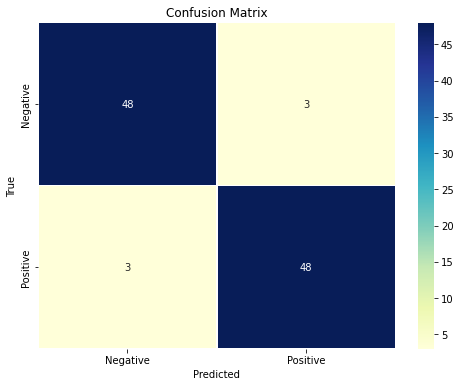

Nadam


7/7 [==============================] - 11s 1s/step - loss: 0.2844 - accuracy: 0.8824
Test Accuracy: 88.24%
7/7 [==============================] - 11s 1s/step
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        51
           1       0.82      0.98      0.89        51

    accuracy                           0.88       102
   macro avg       0.90      0.88      0.88       102
weighted avg       0.90      0.88      0.88       102

7/7 [==============================] - 11s 1s/step


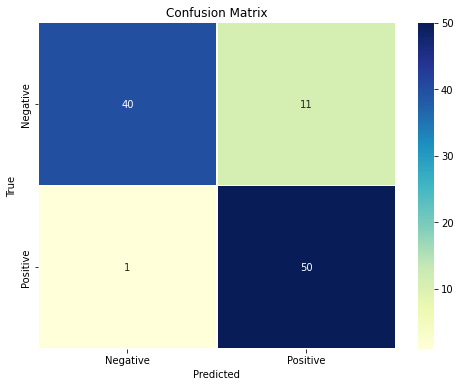

FTRL (Follow The Regularized Leader)


7/7 [==============================] - 12s 2s/step - loss: 0.2371 - accuracy: 0.8922
Test Accuracy: 89.22%
7/7 [==============================] - 12s 2s/step
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        51
           1       0.95      0.82      0.88        51

    accuracy                           0.89       102
   macro avg       0.90      0.89      0.89       102
weighted avg       0.90      0.89      0.89       102

7/7 [==============================] - 12s 2s/step


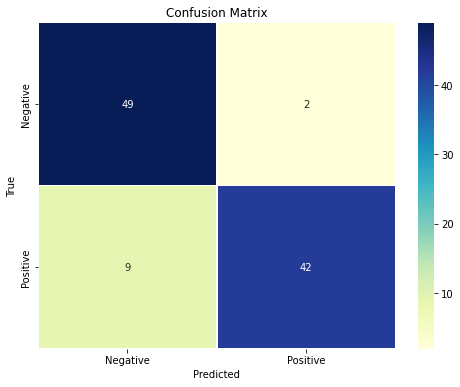

Total Accuracy: 92.44000000000001%


In [2]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

full_path = r'{}'.format(os.getcwd())
TRAIN_PATH = full_path + r"\Train"
VAL_PATH = full_path + r"\Validation"
TEST_PATH = full_path + r"\Test"

batch_size = 16
epochs = 25
IMG_HEIGHT = 300
IMG_WIDTH = 300

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load Data
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

optimizers = {
    'sgd': {
        "Name": "Stochastic Gradient Descent",
        "Function": lambda model: model.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy'])
    },
    'adam': {
        "Name": "Adam",
        "Function": lambda model: model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'rmsprop': {
        "Name": "RMSprop (Root Mean Square Propagation)",
        "Function": lambda model: model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'adagrad': {
        "Name": "Adagrad (Adaptive Gradient Algorithm)",
        "Function": lambda model: model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'adadelta': {
        "Name": "Adadelta",
        "Function": lambda model: model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'nadam': {
        "Name": "Nadam",
        "Function": lambda model: model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
    },
    'ftrl': {
        "Name": "FTRL (Follow The Regularized Leader)",
        "Function": lambda model: model.compile(optimizer='ftrl', loss='binary_crossentropy', metrics=['accuracy'])
    }
}

total_accuracy = 0

for opt in optimizers:
    
    print(optimizers[opt]['Name'])
    # Create a VGG16 base model (excluding the top layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

    # Add custom top layers for binary classification
    x = base_model.output
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    predictions = keras.layers.Dense(1, activation='sigmoid')(x)

    # Combine the base model and custom top layers
    model = keras.Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers of the VGG16 base model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the Model
    history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        verbose=0
    )

    print()
    print()
    test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
    print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
    total_accuracy += round(test_accuracy * 100, 2)

    val_predictions = model.predict(test_generator)

    # Apply a threshold to convert predictions to class labels (0 or 1)
    val_labels = (val_predictions > 0.5).astype(int)

    # Get the true labels from the validation data generator
    val_true_labels = test_generator.classes

    # Generate the classification report
    class_names = ['0', '1']
    report = classification_report(val_true_labels, val_labels, target_names=class_names)

    # Print the classification report
    print(report)

    validation_predictions = model.predict(test_generator)
    predicted_classes = (validation_predictions > 0.5).astype(int)
    true_classes = test_generator.classes

    # Calculate the confusion matrix
    confusion = confusion_matrix(true_classes, predicted_classes)

    # Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
total_accuracy /= 7
print(f"Total Accuracy: {total_accuracy}%")